In [1]:
import pandas as pd 
import scipy.interpolate  
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv("../Datasets/sensorDataset/test/Breaker/f065ea34-14c6-418e-8d4a-8c0d1683c9f3.csv", header=None)

In [25]:
data = data.to_numpy(dtype=np.float32, copy=True)

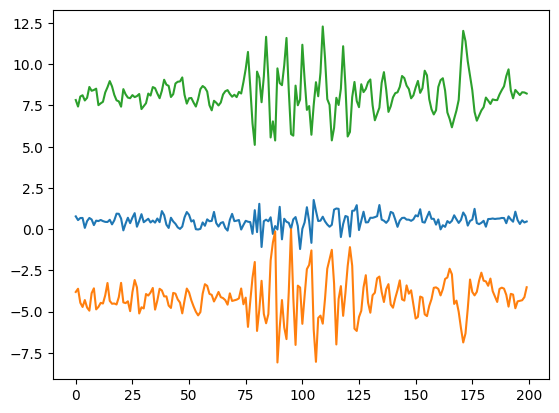

In [26]:
plt.plot(data)
plt.show()

In [13]:
transposedData = data.transpose()

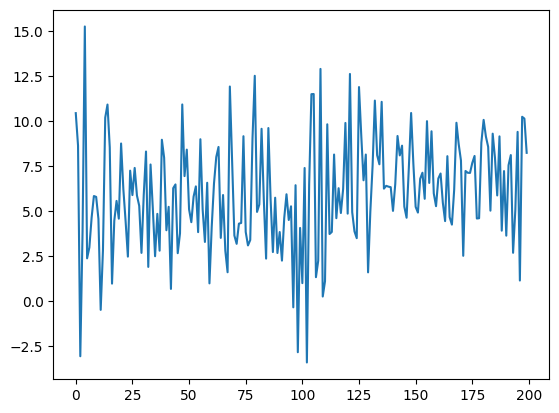

In [14]:
singleData = transposedData[0]
plt.plot(singleData)
plt.show()

In [15]:
scaleFactor = 5
smoothingFactor = 10

In [16]:
x = [(i * scaleFactor) for i in range(len(singleData))] 

# make a spline function to fit the data
spl = scipy.interpolate.make_splrep(x, singleData, s=smoothingFactor)

interpolatedData = [spl(i) for i in range(len(singleData) * scaleFactor)]

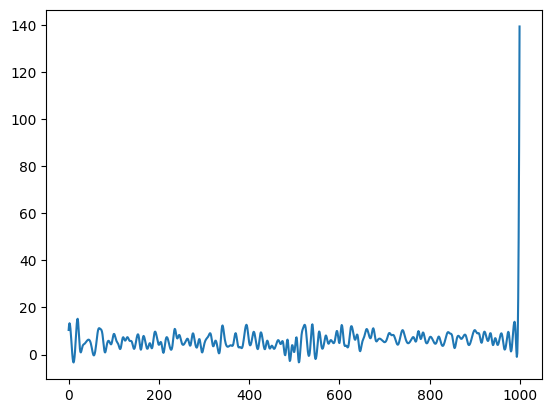

In [17]:
plt.plot(interpolatedData)
plt.show()

In [28]:
newData = []
for i in range(len(transposedData)):
    x = [(i * scaleFactor) for i in range(len(transposedData[i]))] 

    # make a spline function fit the data
    spl = scipy.interpolate.make_splrep(x, transposedData[i], s=smoothingFactor)
    interpolatedData = [spl(i) for i in range(len(transposedData[i]) * scaleFactor)]
    print(interpolatedData)
    newData.append(interpolatedData)

    

[array(10.43232502), array(12.65955497), array(13.29369015), array(12.63410515), array(10.98017459), array(8.63127306), array(5.88677518), array(3.04605554), array(0.40848876), array(-1.72655056), array(-3.05968782), array(-3.36273665), array(-2.69226372), array(-1.17602391), array(1.05822789), array(3.88273676), array(7.11223004), array(10.33136384), array(13.06727651), array(14.84710639), array(15.19799182), array(13.83453986), array(11.22123235), array(8.01001988), array(4.85285301), array(2.40168233), array(1.1443707), array(0.91243029), array(1.37328556), array(2.19436098), array(3.04308102), array(3.65459737), array(4.03497068), array(4.25798881), array(4.39743963), array(4.52711103), array(4.70555489), array(4.93037928), array(5.18395628), array(5.44865797), array(5.70685643), array(5.94092375), array(6.13323201), array(6.2661533), array(6.3220597), array(6.28332328), array(6.13231615), array(5.85141038), array(5.42297805), array(4.82939125), array(4.05302206), array(3.09980231)

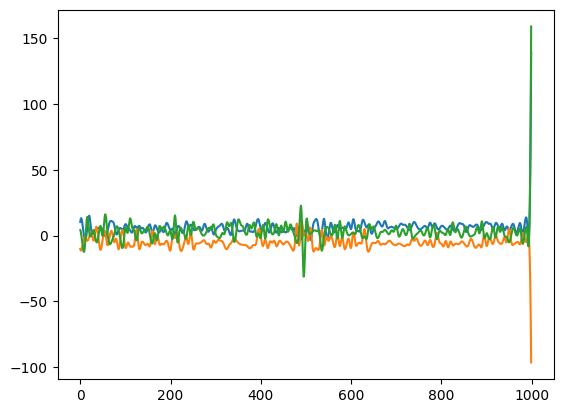

In [19]:
newData = np.asarray(newData)
plt.plot(newData.transpose())
plt.show()

In [20]:
newData

array([[ 10.43232502,  12.65955497,  13.29369015, ...,  49.56669808,
         87.36221023, 139.26181962],
       [-10.11802123, -11.1717594 , -11.26672823, ..., -36.825489  ,
        -62.13949171, -96.35560746],
       [  4.20060007,   3.22747768,   1.24050936, ...,  53.74675266,
         98.24019454, 158.95224726]], shape=(3, 1000))